Based on http://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

In [1]:
import keras

Using Theano backend.


In [53]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [54]:
import glob
dog_filenames = glob.glob('DogsVsCats-kaggle/train/dogs/*.jpg')
cat_filenames = glob.glob('DogsVsCats-kaggle/train/cats/*.jpg')

In [72]:
# dimensions of our images.
img_width, img_height = 150, 150
def load_images(filenames, target_size):
    w, h = target_size
    imgs = np.empty((len(filenames), 3, w, h))
    for i in range(len(dog_filenames)):
        imgs[i] = img_to_array(load_img(filenames[i], target_size=target_size))
    return imgs

In [74]:
np.save('dogs.npy', load_images(dog_filenames, (img_width, img_height)))

In [75]:
np.save('cats.npy', load_images(cat_filenames, (img_width, img_height)))

In [76]:
dogs = np.load('dogs.npy', mmap_mode='r')
cats = np.load('cats.npy', mmap_mode='r')

In [89]:
dog_feats = model.predict(dogs[:10])

In [92]:
dog_feats = dog_feats.reshape((len(dog_feats), -1))

In [93]:
cat_feats = model.predict(cats[:10]).reshape((10, -1))

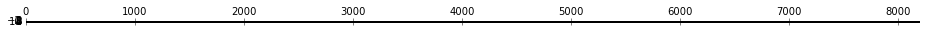

In [94]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.matshow(dog_feats)

In [6]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

img = load_img('DogsVsCats-kaggle/train/cats/cat.0.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='preview', save_prefix='cat', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

In [7]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(3, 150, 150)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# the model so far outputs 3D feature maps (height, width, features)

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


In [8]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        'DogsVsCats-kaggle/train',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=32,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        'DogsVsCats-kaggle/validation',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 22778 images belonging to 2 classes.
Found 2222 images belonging to 2 classes.


In [9]:
model.fit_generator(
        train_generator,
        samples_per_epoch=2000,
        nb_epoch=50,
        validation_data=validation_generator,
        nb_val_samples=800)
model.save_weights('first_try.h5')  # always save your weights after training or during training

Epoch 1/50
1984/2000 [============================>.] - ETA: 0s - loss: 0.7358 - acc: 0.5267

/opt/conda/lib/python3.5/site-packages/keras/engine/training.py:1432: UserWarning: Epoch comprised more than `samples_per_epoch` samples, which might affect learning results. Set `samples_per_epoch` correctly to avoid this warning.
  warnings.warn('Epoch comprised more than '


2016/2000 [==============================] - 113s - loss: 0.7349 - acc: 0.5258 - val_loss: 0.6849 - val_acc: 0.5162
Epoch 2/50
2016/2000 [==============================] - 106s - loss: 0.6937 - acc: 0.5704 - val_loss: 0.6500 - val_acc: 0.6375
Epoch 3/50
2016/2000 [==============================] - 108s - loss: 0.6812 - acc: 0.6012 - val_loss: 0.6186 - val_acc: 0.6622
Epoch 4/50
2016/2000 [==============================] - 111s - loss: 0.6524 - acc: 0.6349 - val_loss: 0.6693 - val_acc: 0.6038
Epoch 5/50
2016/2000 [==============================] - 102s - loss: 0.6258 - acc: 0.6513 - val_loss: 0.6119 - val_acc: 0.6763
Epoch 6/50
2016/2000 [==============================] - 103s - loss: 0.6282 - acc: 0.6791 - val_loss: 0.5768 - val_acc: 0.6892
Epoch 7/50
2016/2000 [==============================] - 103s - loss: 0.6074 - acc: 0.6726 - val_loss: 0.5594 - val_acc: 0.7137
Epoch 8/50
2016/2000 [==============================] - 102s - loss: 0.5879 - acc: 0.6885 - val_loss: 0.5426 - val_acc: 0.

# Bottleneck features

In [39]:
import os
import h5py
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Activation, Dropout, Flatten, Dense

# path to the model weights file.
weights_path = 'vgg16_weights.h5'
top_model_weights_path = 'bottleneck_fc_model.h5'

train_data_dir = 'DogsVsCats-kaggle/train'
validation_data_dir = 'DogsVsCats-kaggle/validation'
nb_train_samples = 2000
nb_validation_samples = 2000


def vgg16_model():
    # build the VGG16 network
    model = Sequential()
    model.add(ZeroPadding2D((1, 1), input_shape=(3, img_width, img_height)))

    model.add(Convolution2D(64, 3, 3, activation='relu', name='conv1_1'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(64, 3, 3, activation='relu', name='conv1_2'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(128, 3, 3, activation='relu', name='conv2_1'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(128, 3, 3, activation='relu', name='conv2_2'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_1'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_2'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_3'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_1'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_2'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_3'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_1'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_2'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_3'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # load the weights of the VGG16 networks
    # (trained on ImageNet, won the ILSVRC competition in 2014)
    # note: when there is a complete match between your model definition
    # and your weight savefile, you can simply call model.load_weights(filename)
    assert os.path.exists(weights_path), 'Model weights not found (see "weights_path" variable in script).'
    f = h5py.File(weights_path)
    for k in range(f.attrs['nb_layers']):
        if k >= len(model.layers):
            # we don't look at the last (fully-connected) layers in the savefile
            break
        g = f['layer_{}'.format(k)]
        weights = [g['param_{}'.format(p)] for p in range(g.attrs['nb_params'])]
        model.layers[k].set_weights(weights)
    f.close()
    return model

In [45]:
model = vgg16_model()
model.build()

In [95]:
f = h5py.File(weights_path)

In [99]:
list(f['layer_0'])

[]

In [ ]:
model

In [ ]:
model.predict()

In [52]:
model.model.layers[-1].output

Pool{ds=(2, 2), ignore_border=True, st=(2, 2), padding=(0, 0), mode='max'}.0

In [10]:
def save_bottlebeck_features():
    datagen = ImageDataGenerator(rescale=1./255)

    model = vgg16_model()
    print('Model loaded.')

    generator = datagen.flow_from_directory(
            train_data_dir,
            target_size=(img_width, img_height),
            batch_size=32,
            class_mode=None,
            shuffle=False)
    bottleneck_features_train = model.predict_generator(generator, nb_train_samples)
    np.save('bottleneck_features_train.npy', bottleneck_features_train)

    generator = datagen.flow_from_directory(
            validation_data_dir,
            target_size=(img_width, img_height),
            batch_size=32,
            class_mode=None,
            shuffle=False)
    bottleneck_features_validation = model.predict_generator(generator, nb_validation_samples)
    np.save('bottleneck_features_validation.npy', bottleneck_features_validation)
save_bottlebeck_features()

Model loaded.
Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [85]:
np.load('bottleneck_features_train.npy', mmap_mode='r').shape

(2000, 512, 4, 4)

In [13]:
from IPython.display import Image

In [29]:
import itertools
gen = ImageDataGenerator(rescale=1/255).flow_from_directory(train_data_dir, target_size=(img_width, img_height), batch_size=10, class_mode=None, shuffle=False)
imgs = next(gen)

Found 2000 images belonging to 2 classes.


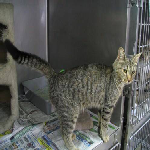

In [38]:
array_to_img(imgs[8])